# TP1: How to handle datasets and probability distributions - Part A: Discrete Random Variables
This TP aims to show how to use datasets in Python and how to obtain the distributions related with it (Part A), and how to expand those methods to continuous distributions (Part B).

In this first part, you are given a dataset with characteristics of the passengers of the Titanic. In the dataset is specified their class (crew, first, second, third), age (enf, adu), sex (m,f) and result (surv, mort). We will give you some code as an example that you must change to answer the questions. Sometimes, you will have to write the code explicitly, showing the mathematical operations behind it, and NOT simply change the name variables.

Complete this part of the notebook by
- Modifying the given code to answer the questions.
- Explaining your reasoning in the part (Your answer here).
- Providing your own code in the space (YOUR CODE HERE) explicitly showing the operations explained.

No other libraries than the ones provided should be used. Submit your TP modifying both jupyter notebooks with your surname and the number of the TP (ex: Reyes_TP1a.ipynb). The TP must be completed individually and submitted before 11/03/2024 at 23:59.

## Dataset

In [4]:
# Keep this unchanged
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

#Download your dataset and save it in the same folder as your notebook. You do NOT need to submit the dataset.
myDataDisc = pd.read_csv("titanic.csv")

In [5]:
###################################
# The information of the dataset: #attributes, #instances, attribute names (...)
###################################
print("data type of df variable is : " + str(type(myDataDisc)))
print("number of lines (instances) is: " + str(myDataDisc.shape[0]))
print("number of columns (features) is: " + str(myDataDisc.shape[1]))

# View the first 5 rows
print(myDataDisc.head())

#Attribute names
print(myDataDisc.columns)

#Importing specific columns
## Defining the columns to read
usecols = ["sex", "result"]
## Read data with subset of columns
myReducedData = pd.read_csv("titanic.csv", usecols=usecols)
print(myReducedData)

#Instead of naming the variables, we can access directly by their position.
# ex: Print the first feature
print(myDataDisc.iloc[:,0])


data type of df variable is : <class 'pandas.core.frame.DataFrame'>
number of lines (instances) is: 2201
number of columns (features) is: 4
   class  age sex result
0  first  adu   m   surv
1  first  adu   m   surv
2  first  adu   m   surv
3  first  adu   m   surv
4  first  adu   m   surv
Index(['class', 'age', 'sex', 'result'], dtype='object')
     sex result
0      m   surv
1      m   surv
2      m   surv
3      m   surv
4      m   surv
...   ..    ...
2196   m   mort
2197   m   mort
2198   m   mort
2199   m   mort
2200   m   mort

[2201 rows x 2 columns]
0       first
1       first
2       first
3       first
4       first
        ...  
2196     crew
2197     crew
2198     crew
2199     crew
2200     crew
Name: class, Length: 2201, dtype: object


## Question 1: Marginal probability
Given some discrete random variable $X$ that gives values in $\mathcal{X} = \{x_1, \dots, x_k\}$ and a random sample of it let us get a sample-based estimate of the $P(X)$. Lets start by looking at the $class$ random variable of the titanic dataset. Print the number of passenger per class. Show how the distribution of passenger per class is computed from there and print the distribution: $P(class)=\{P(class=first), P(class=second), P(class=third), P(class=crew)\}$. 

We will right away see why we call this the marginal probability when we will move to the joint distributions of two variables. Visualise the distributions for all attributes of the titanic dataset. 
 
### Answer 1
(Your answer here)




Sex value counts
sex
m    1749
f     452
Name: count, dtype: int64
Sex probs normalized:
sex
m    0.794639
f    0.205361
Name: proportion, dtype: float64
Sex probs WITHOUT normalized:
sex
m    0.794639
f    0.205361
Name: count, dtype: float64


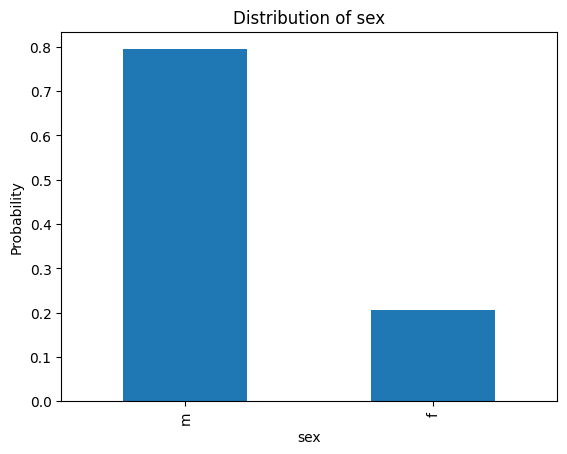

Number of passenger per class
class
crew      873
third     715
first     332
second    281
Name: count, dtype: int64
Distribution of class
class
crew      0.396638
third     0.324852
first     0.150841
second    0.127669
Name: count, dtype: float64


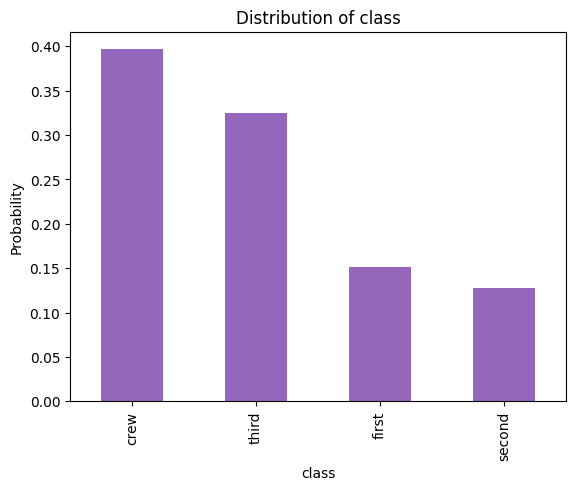

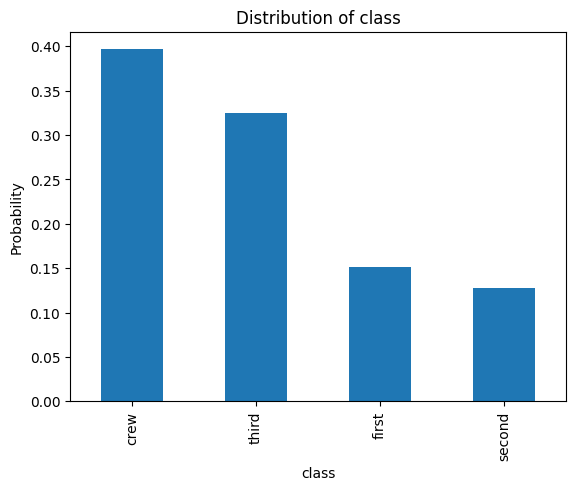

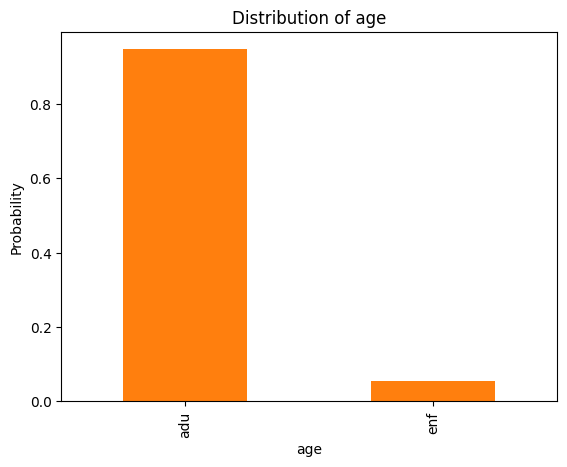

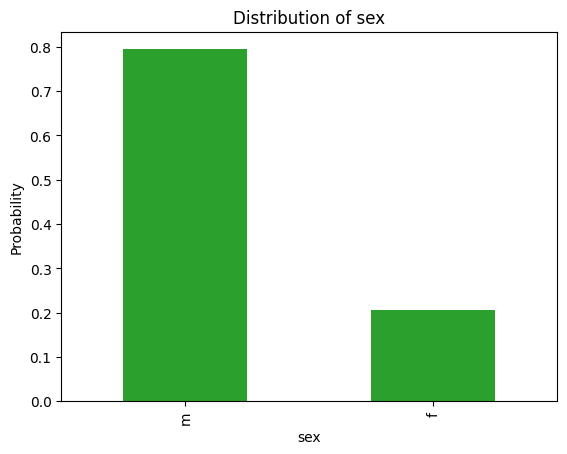

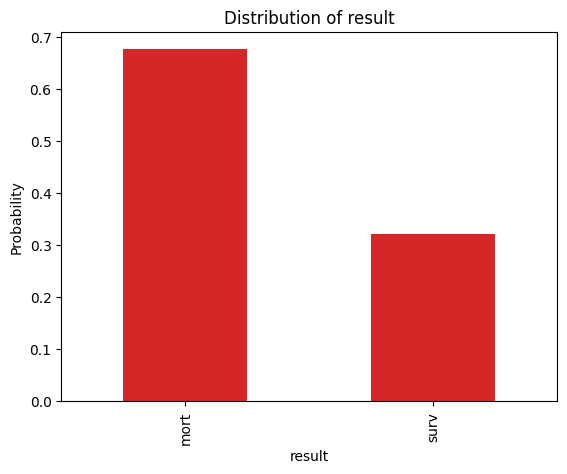

In [49]:
###################################
## Marginal probabilities
###################################

## Sex value counts
print('Sex value counts')
count = myDataDisc['sex'].value_counts()
print(count)

## Sex distribution using normalize
probs = myDataDisc['sex'].value_counts(normalize=True)
print('Sex probs normalized:')
print(probs)

## Sex distribution WITHOUT using normalize

########## YOUR CODE HERE ##########

probs_without_using_normalize = myDataDisc['sex'].value_counts() / myDataDisc['sex'].value_counts().sum()
print('Sex probs WITHOUT normalized:')
print(probs_without_using_normalize)

## Printing the distribution
probs.plot.bar(color='C0')
plt.ylabel('Probability')
plt.title('Distribution of sex');
plt.show()

## Number of passenger per class
count_class = myDataDisc['class'].value_counts()
print('Number of passenger per class')
print(count_class)

## Compute distribution of the number of passenger per class thanks to the informations above
probs_class = count_class / count_class.sum()
print('Distribution of class')
print(probs_class)

## Printing the distribution
probs_class.plot.bar(color='C4')
plt.ylabel('Probability')
plt.title('Distribution of class')
plt.show()

#Printing all distributions:

########## YOUR CODE HERE ##########

## This variable is just used to have a different color on each plot
index = 0

## Compute and plot distribution for each attribute
for i in myDataDisc.columns:
    probs_distrib = myDataDisc[i].value_counts(normalize=True)
    probs_distrib.plot.bar(color=f'C{index}')
    plt.ylabel('Probability')
    plt.title(f'Distribution of {i}')
    plt.show()
    index += 1

## Question 2: Contingency table
So now we move to the concept of joint distributions of two discrete random variables $X,Y$ which we will denote by $P(X,Y)$. Before getting to the joint distribution we need to construct the contigency table $C(X,Y)$ which basically measures how many samples fall within a particular combination of the values of the $X,Y$ r.v. The dimensionality of the contigency table is $|\mathcal X| \times |\mathcal Y|$

Print the contingency table for the r.vs. class and result $C(class,result)$. Show how to derive from there the number of passengers per class (i.e. the row and collumn with 'All' in the contingency with marginals. Given a specific class, how do we obtain the number of people in that class that survived from the contingency table? Observe the relation between the grid visualitation and the contingency table with marginals.
 
### Answer 2
(Your answer here)

Contigency table class and result
result  mort  surv
class             
crew     662   211
first    132   200
second   157   124
third    539   176
Marginal class from the contingency table:
 result
mort    1490
surv     711
dtype: int64
Marginal result from the contingency table:
 class
crew      873
first     332
second    281
third     715
dtype: int64
Contingency with marginals, sex and age
result  mort  surv   All
class                   
crew     662   211   873
first    132   200   332
second   157   124   281
third    539   176   715
All     1490   711  2201
Marginal and joint visualisation for sex and age


/usr/lib/python3/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/lib/python3/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/lib/python3/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/lib/python3/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf

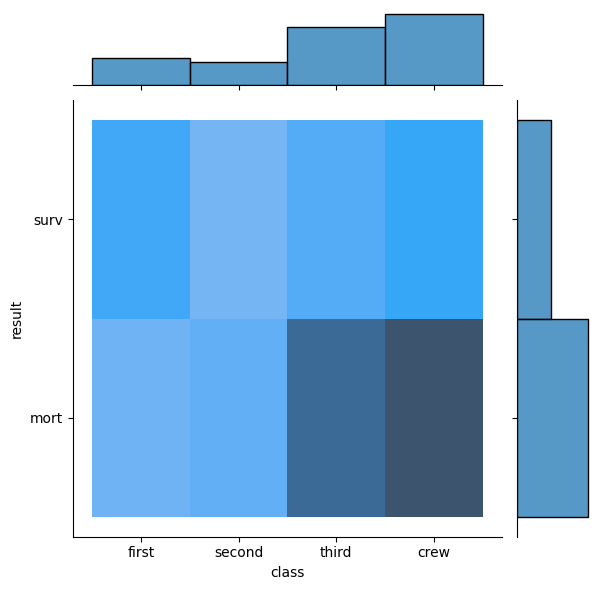

In [52]:
###################################
## Contingency table
###################################

contingencyTable = pd.crosstab(index=myDataDisc['class'], columns=myDataDisc['result'])
print("Contigency table class and result")
print(contingencyTable)


# How to (explicitly) get the marginal from the contingency table:

########## YOUR CODE HERE ##########

## To get the marginal from the contingency table, we must just made a sum to obtain for instance the number of people in that class that survived... So, we have :

print(f"Marginal class from the contingency table:\n {contingencyTable.sum(axis=0)}")
print(f"Marginal result from the contingency table:\n {contingencyTable.sum(axis=1)}")

# Contingency with marginals 
print("Contingency with marginals, sex and age")
print(pd.crosstab(index=myDataDisc['class'], columns=myDataDisc['result'], margins=True))

#Visualisation as a grid
print("Marginal and joint visualisation for sex and age")
sns.jointplot(data=myDataDisc, x="class", y="result", kind="hist")

## Question 3: Joint distribution
The joint distribution $P(X, Y)$ when $X$ and $Y$ are discrete variables is given by a $|\mathcal X| \times |\mathcal Y|$ matrix where a cell $i,j,$ gives the probability $P(X=x_i, Y=y_j)$. 
Obtain the joint distribution and show it as a heat map. Explain how it is calculated from the contingency table.
Display the joint distribution as a bar plot, how many ways are there to do such a visualisation, are they really different?

### Answer 3
(Your answer here)

Joint distribution of sex and age
age       adu       enf
sex                    
f    0.182644  0.022717
m    0.763289  0.031349


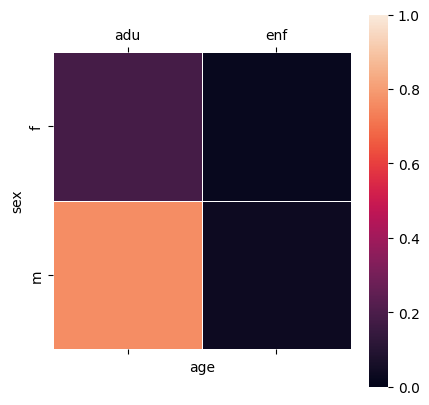

<Axes: title={'center': 'P(age,sex)'}, xlabel='age'>

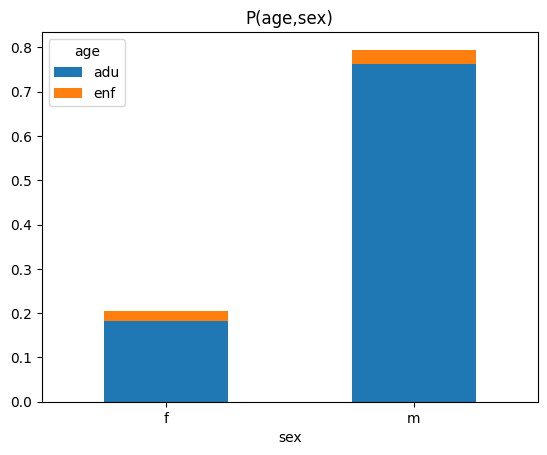

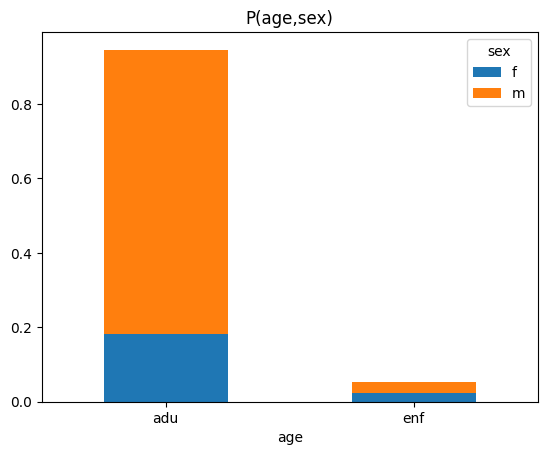

In [61]:
###################################
## Joint distribution
###################################

#TODO: the same thing with class and result !!!!

jointDistribution = pd.crosstab(index=myDataDisc['sex'], columns=myDataDisc['age'],normalize='all')
print("Joint distribution of sex and age")
print(jointDistribution)
plt.matshow(jointDistribution)

## Joint distribution WITHOUT using normalize
########## YOUR CODE HERE ##########

contingencyTable = pd.crosstab(index=myDataDisc['sex'], columns=myDataDisc['age'])
jointDistribution_2 = contingencyTable/contingencyTable.sum().sum()

## Prove that show that the result obtained is the same than the result obtained with normalize
pd.testing.assert_frame_equal(jointDistribution, jointDistribution_2)

#Heatmap of the joint distribution
ax = sns.heatmap(jointDistribution, linewidth=0.5, vmin=0, vmax=1)
plt.show()

# Creating barplot of the joint distribution, taking class as a reference
jointDistribution.plot(kind="bar", stacked=True, rot=0, title="P(age,sex)")
# Or taking result as a reference
jointDistribution.transpose().plot(kind="bar", stacked=True, rot=0, title="P(age,sex)")

## Question 4: Retrieving marginal probabilities
When we have access to the joint probability distribution $P(X,Y)$ we can obtain any of the marginal distributions $P(X)$ and $P(Y)$.

How can you obtain the marginal probability of the class variable from the joint distribution?
Now realise that you have 3 diferent ways to obtain the marginal probability of the class variable, print the results of all 3 (should be the same result).

What happens to the marginal distribution when obtained from the joint distribution of class with respect age and sex?


### Answer 4
(Your answer here)

In [78]:
# From the data restricted to the class (ex 1)
class_count = myDataDisc['class'].value_counts()

########## YOUR CODE HERE ##########

probs_class = class_count / class_count.sum()
print('Get marginal distribution from the data restricted to the class')
print(probs_class)

# From the contingency table (ex 2)
contingencyTable = pd.crosstab(index=myDataDisc['class'], columns=myDataDisc['result'])

########## YOUR CODE HERE ##########

print('Get marginal distrubtion from the contingency table')
probs_class_2 = contingencyTable.sum(axis=1) / contingencyTable.sum(axis=1).sum()
print(probs_class_2)

pd.testing.assert_series_equal(probs_class, probs_class_2, check_like=True, check_names=False)

# From the joint distribution
jointDistributionClassResult = pd.crosstab(index=myDataDisc['class'], columns=myDataDisc['result'],normalize='all')

##P(class)

########## YOUR CODE HERE ##########

##P(result)

########## YOUR CODE HERE ##########

#Joint distribution with respect to age and wrt sex:
jointDistributionClassAge = pd.crosstab(index=myDataDisc['class'], columns=myDataDisc['age'],normalize='all')
jointDistributionClassSex = pd.crosstab(index=myDataDisc['class'], columns=myDataDisc['sex'],normalize='all')

## Marginal distribution of the class computed from the previous joint distributions:

########## YOUR CODE HERE ##########


Get marginal distribution from the data restricted to the class
class
crew      0.396638
third     0.324852
first     0.150841
second    0.127669
Name: count, dtype: float64
Get marginal distrubtion from the contingency table
class
crew      0.396638
first     0.150841
second    0.127669
third     0.324852
dtype: float64


## Question 5
Having the joint distribution $P(X,Y)$ can give us direct access to any of the conditional distributions $P(X|Y)$ and $P(Y|X)$ by appropriate normalisations of the joint distribution. What are the normalisations of $P(X,Y)$ that deliver $P(X|Y)$ and $P(Y|X)$?

Show the above by plotting the conditional probabilities of the result given the class $P(result|class)$. Explain step by step how these probabilities are obtained from the joint probability. Show it as a barplot, what is the relation with the one in Question 3?

### Answer 5
(Your answer here)


Conditional distribution: conditions on the row values, i.e P(age|sex)
sex         f         m
age                    
adu  0.889381  0.960549
enf  0.110619  0.039451


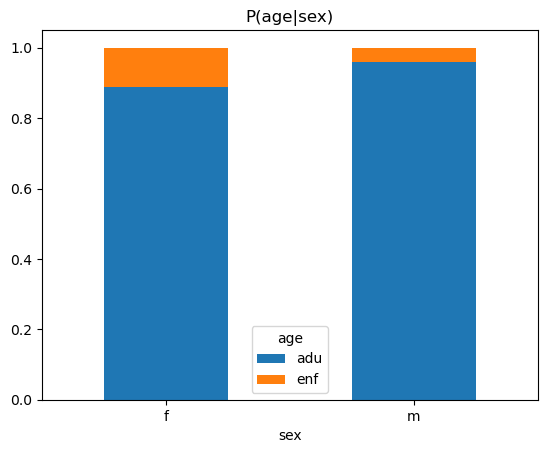

In [7]:
###################################
## Conditional distribution
###################################

# Using normalize
conditionalDistributionColRow = pd.crosstab(index=myDataDisc['sex'], columns=myDataDisc['age'],normalize='index')
print("Conditional distribution: conditions on the row values, i.e P(age|sex)")
print(conditionalDistributionColRow.transpose())
conditionalDistributionColRow.plot(kind="bar", stacked=True, rot=0, title="P(age|sex)")

# From the joint distribution
jointDistribution = pd.crosstab(index=myDataDisc['class'], columns=myDataDisc['result'],normalize='all')

########## YOUR CODE HERE ##########

## Question 6
Now, compute and visualise all P(result|X) where is X is class, sex and age. Which are the values that has the highest chances of surv for each X?. Is that the best combination of features to survive?

## Answer 6
(Your answer here)

In [8]:
#Conditional distributions plot

########## YOUR CODE HERE ##########